In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
!unzip gdrive/My\ Drive/archive.zip

Archive:  gdrive/My Drive/archive.zip
replace data/cats.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from scipy import ndimage, misc
import skimage
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

In [42]:
filelist  = []

for dirname, _, filenames in os.walk('/content/images/'):
    for filename in filenames:
        filelist.append (os.path.join(dirname, filename))

In [43]:
filelist

['/content/images/Himalayan/43964454_549.jpg',
 '/content/images/Himalayan/32258280_2988.jpg',
 '/content/images/Himalayan/38635232_1510.jpg',
 '/content/images/Himalayan/46002978_152.jpg',
 '/content/images/Himalayan/46694374_7.jpg',
 '/content/images/Himalayan/37415091_1754.jpg',
 '/content/images/Himalayan/39835191_1286.jpg',
 '/content/images/Himalayan/46092356_133.jpg',
 '/content/images/Himalayan/42300569_818.jpg',
 '/content/images/Himalayan/33475097_2733.jpg',
 '/content/images/Himalayan/38110610_1597.jpg',
 '/content/images/Himalayan/37767515_1675.jpg',
 '/content/images/Himalayan/33456010_2737.jpg',
 '/content/images/Himalayan/38853255_1472.jpg',
 '/content/images/Himalayan/44059422_523.jpg',
 '/content/images/Himalayan/41624714_951.jpg',
 '/content/images/Himalayan/34192881_2531.jpg',
 '/content/images/Himalayan/34671684_2397.jpg',
 '/content/images/Himalayan/39441206_1363.jpg',
 '/content/images/Himalayan/32471878_2947.jpg',
 '/content/images/Himalayan/33425142_2745.jpg',
 

In [44]:
Filepaths   = []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    Filepaths.append(image_file)
    labels.append(label)

In [45]:
set(labels)

{'Abyssinian',
 'American Bobtail',
 'American Curl',
 'American Shorthair',
 'American Wirehair',
 'Applehead Siamese',
 'Balinese',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Burmese',
 'Burmilla',
 'Calico',
 'Canadian Hairless',
 'Chartreux',
 'Chausie',
 'Chinchilla',
 'Cornish Rex',
 'Cymric',
 'Devon Rex',
 'Dilute Calico',
 'Dilute Tortoiseshell',
 'Domestic Long Hair',
 'Domestic Medium Hair',
 'Domestic Short Hair',
 'Egyptian Mau',
 'Exotic Shorthair',
 'Extra-Toes Cat - Hemingway Polydactyl',
 'Havana',
 'Himalayan',
 'Japanese Bobtail',
 'Javanese',
 'Korat',
 'LaPerm',
 'Maine Coon',
 'Manx',
 'Munchkin',
 'Nebelung',
 'Norwegian Forest Cat',
 'Ocicat',
 'Oriental Long Hair',
 'Oriental Short Hair',
 'Oriental Tabby',
 'Persian',
 'Pixiebob',
 'Ragamuffin',
 'Ragdoll',
 'Russian Blue',
 'Scottish Fold',
 'Selkirk Rex',
 'Siamese',
 'Siberian',
 'Silver',
 'Singapura',
 'Snowshoe',
 'Somali',
 'Sphynx - Hairless Cat',
 'Tabby',
 'Tiger',
 'Tonkinese',
 'Torbi

In [46]:
len(Filepaths), len(labels)

(126607, 126607)

In [47]:
df = pd.DataFrame( list( zip (Filepaths, labels) ), columns = ['Filepath', 'Labels'] )
df

Filepath     Labels
0        /content/images/Himalayan/43964454_549.jpg  Himalayan
1       /content/images/Himalayan/32258280_2988.jpg  Himalayan
2       /content/images/Himalayan/38635232_1510.jpg  Himalayan
3        /content/images/Himalayan/46002978_152.jpg  Himalayan
4          /content/images/Himalayan/46694374_7.jpg  Himalayan
...                                             ...        ...
126602    /content/images/Munchkin/36862032_221.jpg   Munchkin
126603    /content/images/Munchkin/33856531_290.jpg   Munchkin
126604    /content/images/Munchkin/35225477_248.jpg   Munchkin
126605    /content/images/Munchkin/36304707_232.jpg   Munchkin
126606  /content/images/Munchkin/46534825_20465.jpg   Munchkin

[126607 rows x 2 columns]

In [48]:
from sklearn.utils import shuffle
df = (df.sample(frac = 1).reset_index()).drop(columns = 'index')
df

Filepath  \
0       /content/images/Dilute Tortoiseshell/37622242_...   
1       /content/images/Domestic Short Hair/46299089_4...   
2       /content/images/Domestic Short Hair/46429250_3...   
3       /content/images/Domestic Short Hair/46424211_3...   
4       /content/images/Domestic Short Hair/46491399_2...   
...                                                   ...   
126602    /content/images/Tortoiseshell/42141486_9201.jpg   
126603  /content/images/Domestic Short Hair/46390171_3...   
126604  /content/images/Domestic Short Hair/46552595_1...   
126605  /content/images/Domestic Short Hair/46645360_4...   
126606            /content/images/Tiger/44569610_2215.jpg   

                      Labels  
0       Dilute Tortoiseshell  
1        Domestic Short Hair  
2        Domestic Short Hair  
3        Domestic Short Hair  
4        Domestic Short Hair  
...                      ...  
126602         Tortoiseshell  
126603   Domestic Short Hair  
126604   Domestic Short Hair  
126605   Domestic Short Hair  
126606                 Tiger  

[126607 rows x 2 columns]

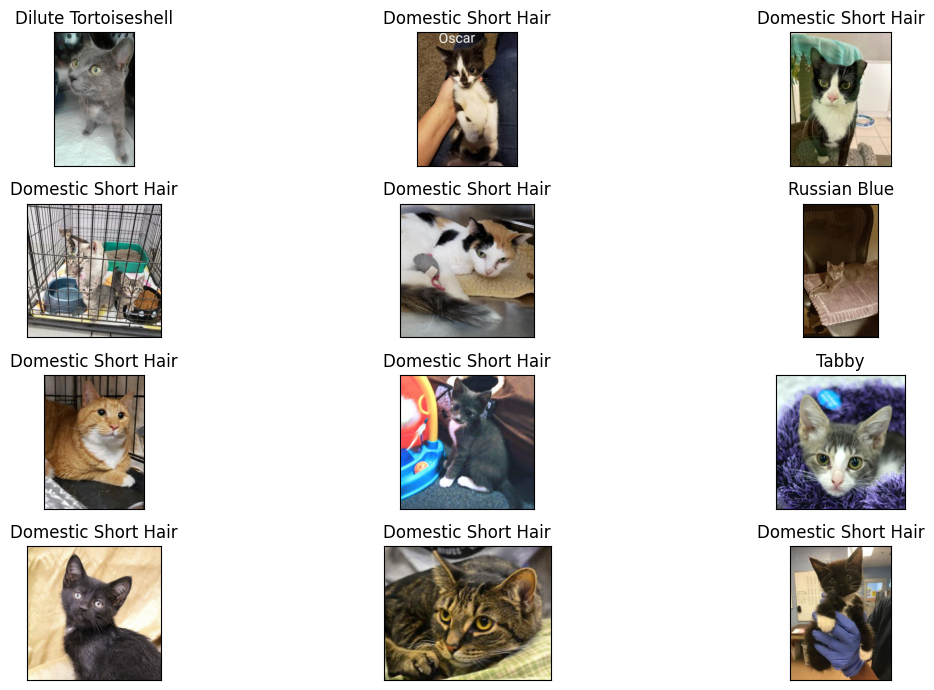

In [49]:
f,a = plt.subplots(nrows=4, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Labels[i])
    
plt.tight_layout()
plt.show()

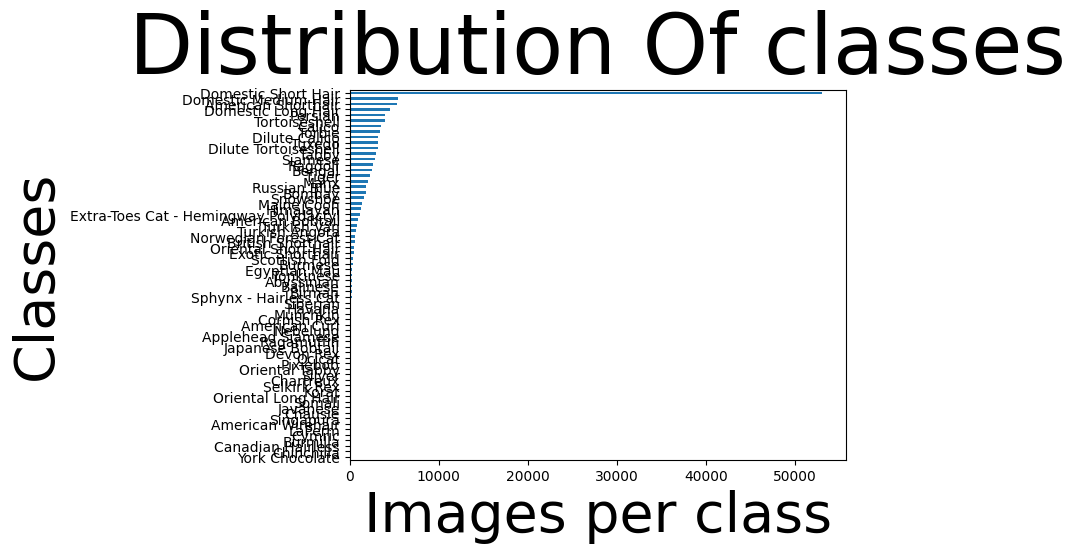

In [50]:
ax=pd.value_counts(df['Labels'],ascending=True).plot(kind='barh',
                                                      #  fontsize="40",
                                                       title="Distribution Of classes",
                                                      #  figsize=(15,8)
                                                       )
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

In [51]:
df.Labels.value_counts()

Domestic Short Hair     53027
Domestic Medium Hair     5482
American Shorthair       5295
Domestic Long Hair       4499
Persian                  4018
                        ...  
Cymric                     17
Burmilla                    8
Canadian Hairless           4
Chinchilla                  3
York Chocolate              1
Name: Labels, Length: 67, dtype: int64

In [52]:
train_ratio = .75
validation_ratio = 0.10
test_ratio = 0.25

train, test = train_test_split(df, test_size = test_ratio )
val, test = train_test_split(test, test_size=test_ratio/(test_ratio + validation_ratio))

In [60]:
img_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
   

x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_val = img_datagen.flow_from_dataframe(dataframe = val,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)
x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Filepath', y_col='Labels',  target_size=(299, 299), shuffle=False, batch_size=10, seed=10)

Found 94955 validated image filenames belonging to 67 classes.
Found 9043 validated image filenames belonging to 62 classes.
Found 22609 validated image filenames belonging to 65 classes.


In [61]:
x_train

In [62]:
i_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(299, 299, 3))

In [63]:
for layer in i_model.layers:
    layer.trainable = False
    
i_model.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                      

In [64]:
model = Sequential()
model.add(i_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(67, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 62)                7998      
                                                                 
Total params: 22,073,054
Trainable params: 270,270
Non-trainable params: 21,802,784
____________________________________

In [65]:
model.compile(optimizer = SGD(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [66]:
history = model.fit(x_train, validation_data = x_val,steps_per_epoch = 175,validation_steps = 44,
                epochs = 15, verbose = 2)

Epoch 1/15


InvalidArgumentError: ignored

In [202]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from sklearn.utils import class_weight

In [203]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3


import tensorflow_hub as hub

In [204]:
filelist  = []

for dirname, _, filenames in os.walk('/content/images/'):
    for filename in filenames:
        filelist.append(os.path.join(dirname, filename))

In [205]:
len(filelist)

126607

In [206]:
Filepaths   = []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    if label not in ['Canadian Hairless','Chinchilla','York Chocolate','Burmilla']:
      Filepaths.append(image_file)
      labels.append(label)

In [207]:
len(Filepaths), len(labels)


(126591, 126591)

In [208]:
Filepaths[:5], labels[:5]


(['/content/images/Himalayan/43964454_549.jpg',
  '/content/images/Himalayan/32258280_2988.jpg',
  '/content/images/Himalayan/38635232_1510.jpg',
  '/content/images/Himalayan/46002978_152.jpg',
  '/content/images/Himalayan/46694374_7.jpg'],
 ['Himalayan', 'Himalayan', 'Himalayan', 'Himalayan', 'Himalayan'])

In [209]:
len(set(labels))


63

In [210]:
df = pd.DataFrame(list(zip(Filepaths, labels)), columns = ['Filepath', 'Labels'] )
df = (df.sample(frac = 1, random_state=42).reset_index()).drop(columns = 'index')
df.head()

Filepath  \
0  /content/images/Domestic Short Hair/46451587_2...   
1    /content/images/Tortoiseshell/46067867_1551.jpg   
2  /content/images/Domestic Short Hair/46520720_2...   
3  /content/images/Extra-Toes Cat - Hemingway Pol...   
4  /content/images/Domestic Short Hair/46730836_5...   

                                  Labels  
0                    Domestic Short Hair  
1                          Tortoiseshell  
2                    Domestic Short Hair  
3  Extra-Toes Cat - Hemingway Polydactyl  
4                    Domestic Short Hair

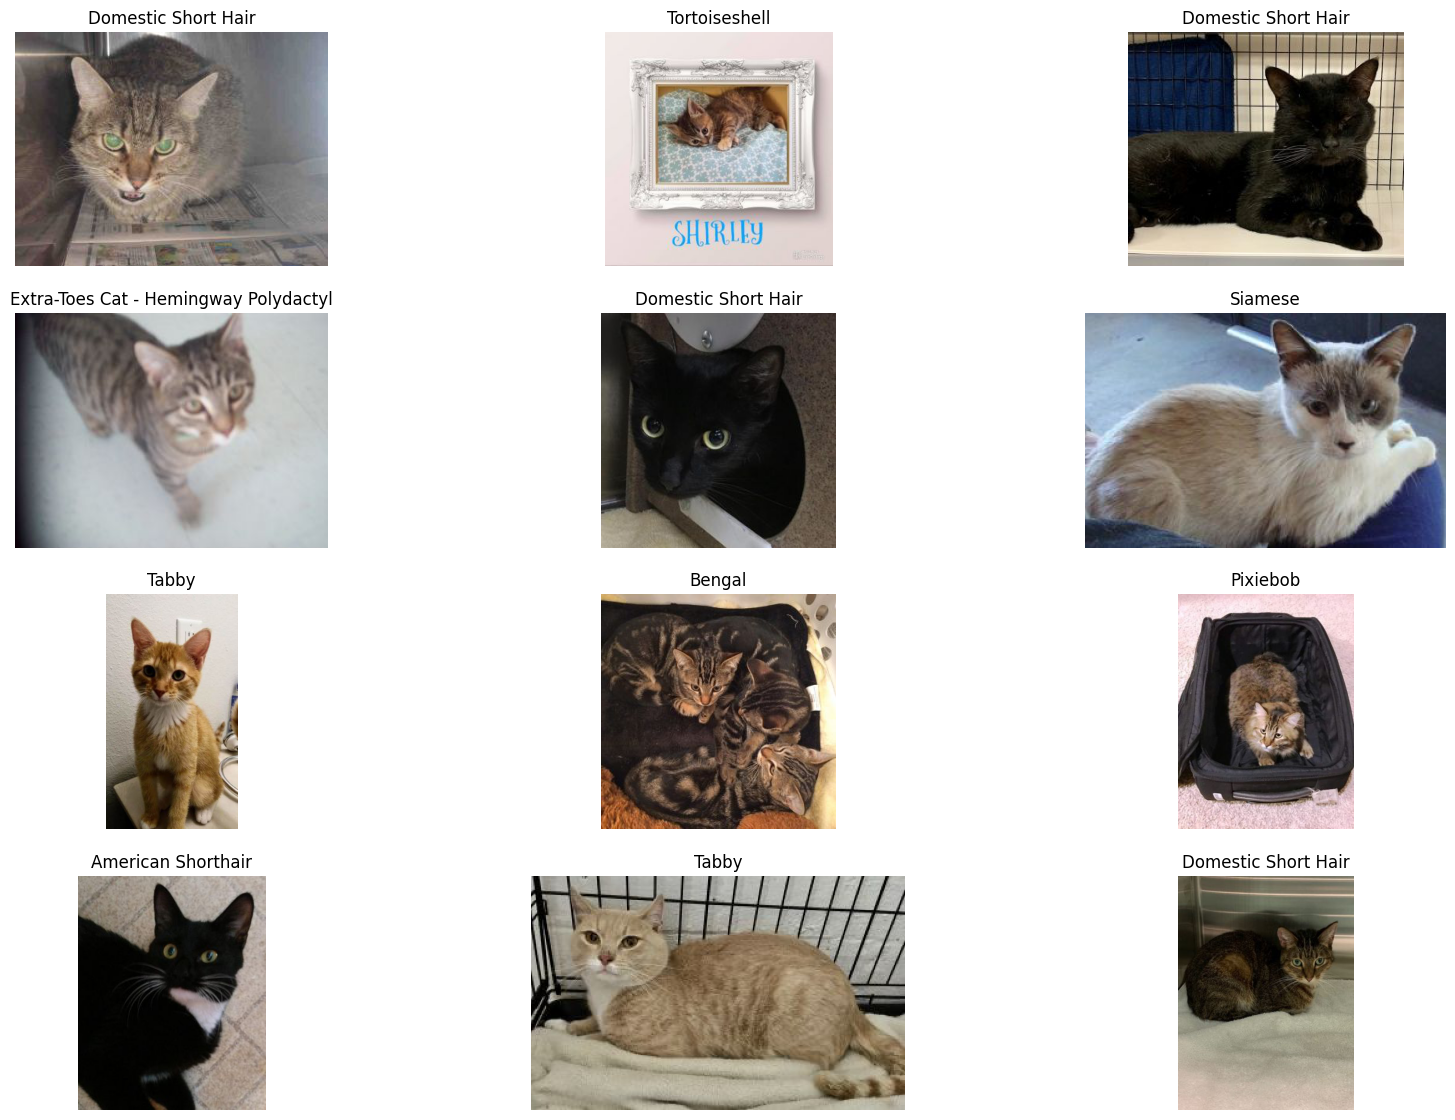

In [211]:
fig, axis = plt.subplots(4, 3,figsize=(20, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Labels[i])
    ax.axis('off')
    
plt.show()

In [212]:
pd.value_counts(df['Labels'],ascending=False).tail(10)


Selkirk Rex           77
Korat                 68
Oriental Long Hair    37
Somali                36
Javanese              25
Chausie               24
Singapura             22
American Wirehair     19
Cymric                17
LaPerm                17
Name: Labels, dtype: int64

In [213]:
pd.DataFrame(df['Labels'].unique()).to_csv("cat_breeds.csv", index=False, header=False)

In [214]:
# val_ratio = 0.2
# test_ratio = 0.2

# train, test = train_test_split(df, test_size=test_ratio, random_state=42)
# val, test = train_test_split(test, test_size=val_ratio, random_state=42)

val_ratio = 0.2
test_ratio = 0.2

# Split the data into train, validation, and test sets, stratifying by the "Labels" column
train, test = train_test_split(df, test_size=test_ratio, random_state=42, stratify=df["Labels"])
val, test = train_test_split(test, test_size=val_ratio, random_state=42, stratify=test["Labels"])

len(train), len(val), len(test)

(101272, 20255, 5064)

In [215]:
# Merge the small classes into a single class called "Other"
train["Labels"] = train["Labels"].apply(lambda x: "Other" if x in ["LaPerm", "Cymric", "American Wirehair"] else x)
val["Labels"] = val["Labels"].apply(lambda x: "Other" if x in ["LaPerm", "Cymric", "American Wirehair"] else x)
test["Labels"] = test["Labels"].apply(lambda x: "Other" if x in ["LaPerm", "Cymric", "American Wirehair"] else x)


In [216]:
# img_datagen = ImageDataGenerator(rescale=1./255, 
#                                  rotation_range=30, 
#                                  width_shift_range=0.2,
#                                  height_shift_range=0.2, 
#                                  horizontal_flip = 'true')
# Create an ImageDataGenerator with data augmentation
img_datagen = ImageDataGenerator(rescale=1./255, 
                                 rotation_range=30, 
                                 width_shift_range=0.2,
                                 height_shift_range=0.2, 
                                 horizontal_flip=True)

In [217]:
# train_generator=img_datagen.flow_from_dataframe(dataframe=train,
#                                                 x_col="Filepath",
#                                                 y_col="Labels",
#                                                 batch_size=32,
#                                                 seed=42,
#                                                 shuffle=True,
#                                                 target_size=(299, 299))
# Create the data generators for the train, validation, and test sets
train_generator = img_datagen.flow_from_dataframe(dataframe=train,
                                                  x_col="Filepath",
                                                  y_col="Labels",
                                                  batch_size=32,
                                                  seed=42,
                                                  shuffle=True,
                                                  target_size=(299, 299))

Found 101272 validated image filenames belonging to 61 classes.


In [218]:
# val_generator=img_datagen.flow_from_dataframe(dataframe=val,
#                                               x_col="Filepath",
#                                               y_col="Labels",
#                                               batch_size=32,
#                                               seed=42,
#                                               shuffle=True,
#                                               target_size=(299, 299))

# test_generator=img_datagen.flow_from_dataframe(dataframe=test,
#                                                x_col="Filepath",
#                                                y_col="Labels",
#                                                batch_size=32,
#                                                seed=42,
#                                                shuffle=True,
#                                                target_size=(299, 299))

val_generator = img_datagen.flow_from_dataframe(dataframe=val,
                                                x_col="Filepath",
                                                y_col="Labels",
                                                batch_size=32,
                                                seed=42,
                                                shuffle=True,
                                                target_size=(299, 299))

test_generator = img_datagen.flow_from_dataframe(dataframe=test,
                                                 x_col="Filepath",
                                                 y_col="Labels",
                                                 batch_size=32,
                                                 seed=42,
                                                 shuffle=True,
                                                 target_size=(299, 299))

Found 20255 validated image filenames belonging to 61 classes.
Found 5064 validated image filenames belonging to 61 classes.


In [219]:
def custom_generator(generator):
    while True:
        try:
            data = next(generator)
            yield data
        except (OSError, ValueError):
            print("Broken data stream or image, skipping...")
            continue

In [220]:
custom_train_generator = custom_generator(train_generator)
custom_val_generator = custom_generator(val_generator)
custom_test_generator = custom_generator(test_generator)

In [221]:
df.Labels.value_counts()

Domestic Short Hair     53027
Domestic Medium Hair     5482
American Shorthair       5295
Domestic Long Hair       4499
Persian                  4018
                        ...  
Chausie                    24
Singapura                  22
American Wirehair          19
Cymric                     17
LaPerm                     17
Name: Labels, Length: 63, dtype: int64

In [222]:
i_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(299, 299, 3))


In [223]:
for layer in i_model.layers:
    layer.trainable = False
    
i_model.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 149, 149, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                      

In [224]:
model = Sequential()
model.add(i_model)

model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(61, activation = 'softmax'))

model.build([None, 224, 224, 3])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 128)               262272    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 61)                7869      
                                                                 
Total params: 22,072,925
Trainable params: 270,141
Non-trainable params: 21,802,784
____________________________________

In [225]:
model.compile(optimizer = Adam(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [226]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [227]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 5)


In [ ]:
# history = model.fit(train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=val_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     callbacks=cb_early_stopper,
#                     epochs=10)
history = model.fit(custom_train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=custom_val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=[cb_early_stopper],
                    epochs=10)


Epoch 1/10
3164/3164 [==============================] - 2909s 918ms/step - loss: 2.1649 - accuracy: 0.4557 - val_loss: 1.9493 - val_accuracy: 0.4843
Epoch 2/10
3164/3164 [==============================] - 2823s 892ms/step - loss: 2.0111 - accuracy: 0.4739 - val_loss: 1.9468 - val_accuracy: 0.4892
Epoch 3/10
2898/3164 [==========================>...] - ETA: 3:17 - loss: 1.9802 - accuracy: 0.4804

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# metrics = history.history['accuracy']
# epochs_range = range(1, len(metrics) + 1) 

# plt.figure(figsize=(23, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
# model.evaluate(test_generator,
#                steps=STEP_SIZE_TEST)

In [ ]:
# model.evaluate(test_generator,
#                steps=STEP_SIZE_TEST)

# model_score = model.evaluate(test_generator, steps=STEP_SIZE_TEST)

# print("Model Test Loss:",model_score[0])
# print("Model Test Accuracy:",model_score[1])
    
# model.save("model/cat_breeds_model.h5")
# print("Weights Saved")

In [ ]:
# import logging

# logger = logging.getLogger(__name__)

# for x_batch, y_batch in train_generator:
#     for i in range(3):
#         try:
#             loss = model.train_on_batch(x_batch, y_batch)
#             break
#         except OSError:
#             logger.warning('Encountered a broken image file in batch {}, retrying...'.format(i))
#             continue
#     else:
#         logger.error('Failed to process batch {}, skipping...'.format(i))
#         continue


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!tar -xvf "/content/gdrive/MyDrive/images.tar" -C "/content/"     #[run this cell to extract tar.bz2 files]

Streaming output truncated to the last 5000 lines.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n

In [6]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from sklearn.utils import class_weight

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3


import tensorflow_hub as hub

In [8]:
filelist  = []

for dirname, _, filenames in os.walk('/content/Images/'):
    for filename in filenames:
        filelist.append(os.path.join(dirname, filename))

In [9]:
Filepaths   = []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    Filepaths.append(image_file)
    labels.append(label)

In [10]:
len(Filepaths), len(labels)


(20580, 20580)

In [11]:
Filepaths[:5], labels[:5]


(['/content/Images/n02116738-African_hunting_dog/n02116738_4732.jpg',
  '/content/Images/n02116738-African_hunting_dog/n02116738_3422.jpg',
  '/content/Images/n02116738-African_hunting_dog/n02116738_5068.jpg',
  '/content/Images/n02116738-African_hunting_dog/n02116738_2675.jpg',
  '/content/Images/n02116738-African_hunting_dog/n02116738_8579.jpg'],
 ['n02116738-African_hunting_dog',
  'n02116738-African_hunting_dog',
  'n02116738-African_hunting_dog',
  'n02116738-African_hunting_dog',
  'n02116738-African_hunting_dog'])

In [12]:
len(set(labels))


120

In [13]:
df = pd.DataFrame(list(zip(Filepaths, labels)), columns = ['Filepath', 'Labels'] )
df = (df.sample(frac = 1, random_state=42).reset_index()).drop(columns = 'index')
df.head()

Filepath  \
0  /content/Images/n02106166-Border_collie/n02106...   
1  /content/Images/n02109961-Eskimo_dog/n02109961...   
2  /content/Images/n02098413-Lhasa/n02098413_1096...   
3  /content/Images/n02091467-Norwegian_elkhound/n...   
4  /content/Images/n02107142-Doberman/n02107142_6...   

                         Labels  
0       n02106166-Border_collie  
1          n02109961-Eskimo_dog  
2               n02098413-Lhasa  
3  n02091467-Norwegian_elkhound  
4            n02107142-Doberman

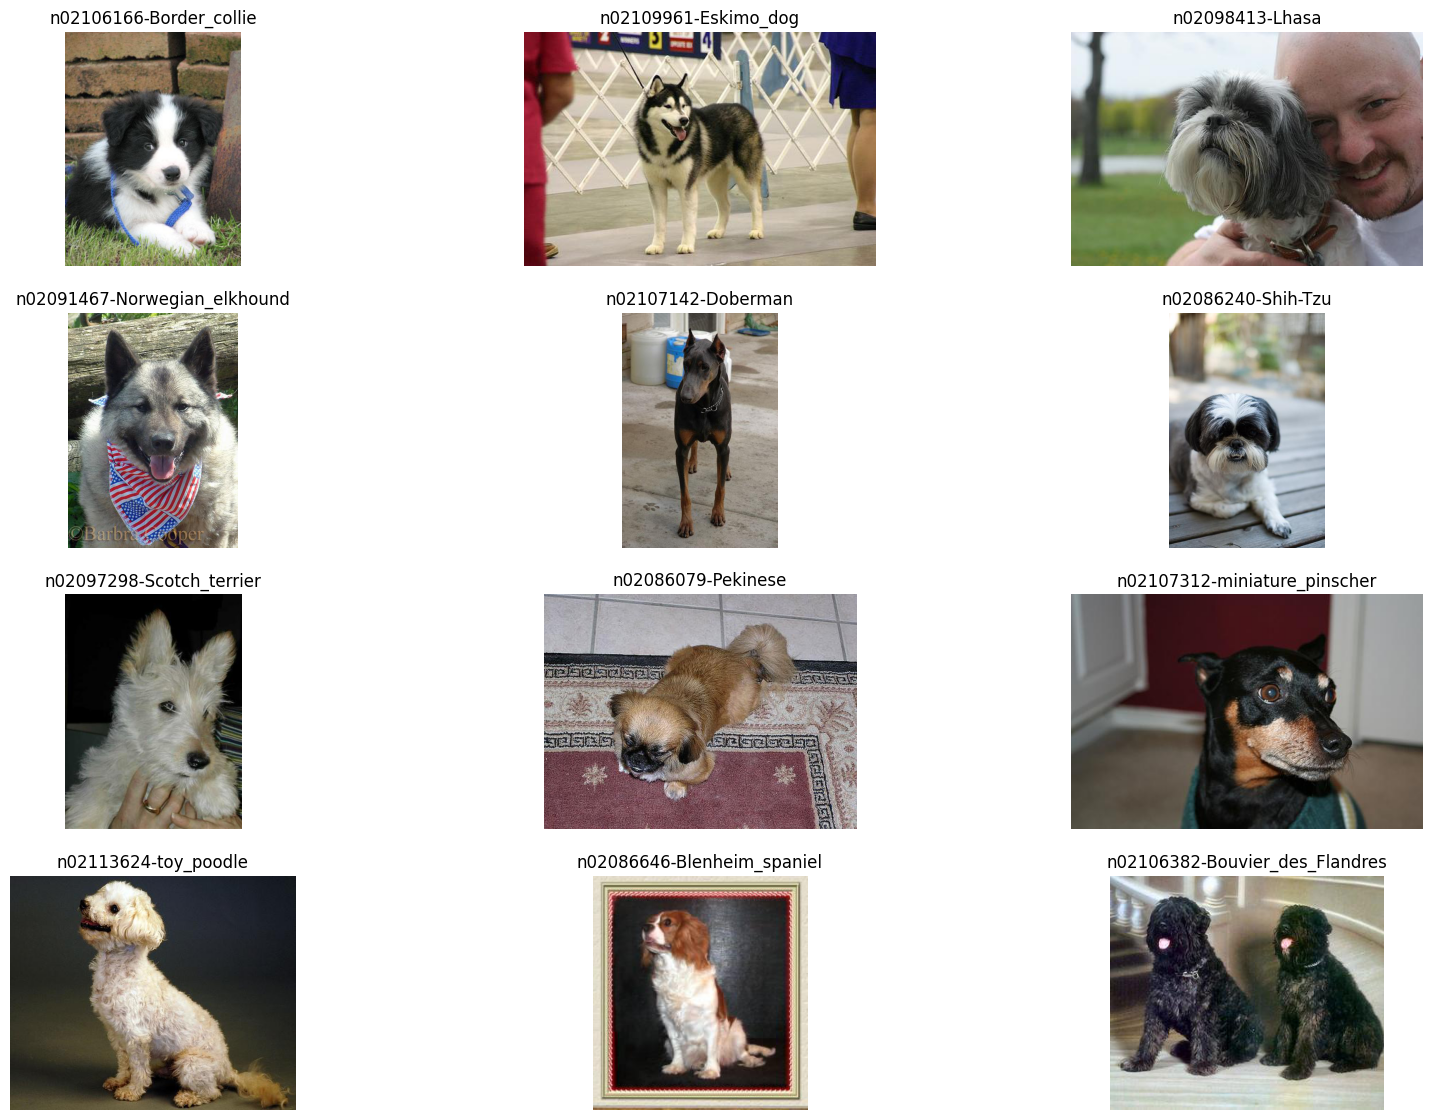

In [14]:
fig, axis = plt.subplots(4, 3,figsize=(20, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Labels[i])
    ax.axis('off')
    
plt.show()

In [15]:
pd.value_counts(df['Labels'],ascending=False).tail(10)

n02109961-Eskimo_dog                150
n02105056-groenendael               150
n02107142-Doberman                  150
n02102177-Welsh_springer_spaniel    150
n02106382-Bouvier_des_Flandres      150
n02104029-kuvasz                    150
n02101556-clumber                   150
n02106166-Border_collie             150
n02086079-Pekinese                  149
n02090379-redbone                   148
Name: Labels, dtype: int64

In [16]:
pd.DataFrame(df['Labels'].unique()).to_csv("dog_breeds.csv", index=False, header=False)

In [17]:
# val_ratio = 0.2
# test_ratio = 0.2

# train, test = train_test_split(df, test_size=test_ratio, random_state=42)
# val, test = train_test_split(test, test_size=val_ratio, random_state=42)

val_ratio = 0.2
test_ratio = 0.2

# Split the data into train, validation, and test sets, stratifying by the "Labels" column
train, test = train_test_split(df, test_size=test_ratio, random_state=42, stratify=df["Labels"])
val, test = train_test_split(test, test_size=val_ratio, random_state=42, stratify=test["Labels"])

len(train), len(val), len(test)

(16464, 3292, 824)

In [18]:
# img_datagen = ImageDataGenerator(rescale=1./255, 
#                                  rotation_range=30, 
#                                  width_shift_range=0.2,
#                                  height_shift_range=0.2, 
#                                  horizontal_flip = 'true')
# Create an ImageDataGenerator with data augmentation
img_datagen = ImageDataGenerator(rescale=1./255, 
                                 rotation_range=30, 
                                 width_shift_range=0.2,
                                 height_shift_range=0.2, 
                                 horizontal_flip=True)

In [19]:
# train_generator=img_datagen.flow_from_dataframe(dataframe=train,
#                                                 x_col="Filepath",
#                                                 y_col="Labels",
#                                                 batch_size=32,
#                                                 seed=42,
#                                                 shuffle=True,
#                                                 target_size=(299, 299))
# Create the data generators for the train, validation, and test sets
train_generator = img_datagen.flow_from_dataframe(dataframe=train,
                                                  x_col="Filepath",
                                                  y_col="Labels",
                                                  batch_size=32,
                                                  seed=42,
                                                  shuffle=True,
                                                  target_size=(299, 299))

Found 16464 validated image filenames belonging to 120 classes.


In [20]:
# val_generator=img_datagen.flow_from_dataframe(dataframe=val,
#                                               x_col="Filepath",
#                                               y_col="Labels",
#                                               batch_size=32,
#                                               seed=42,
#                                               shuffle=True,
#                                               target_size=(299, 299))

# test_generator=img_datagen.flow_from_dataframe(dataframe=test,
#                                                x_col="Filepath",
#                                                y_col="Labels",
#                                                batch_size=32,
#                                                seed=42,
#                                                shuffle=True,
#                                                target_size=(299, 299))

val_generator = img_datagen.flow_from_dataframe(dataframe=val,
                                                x_col="Filepath",
                                                y_col="Labels",
                                                batch_size=32,
                                                seed=42,
                                                shuffle=True,
                                                target_size=(299, 299))

test_generator = img_datagen.flow_from_dataframe(dataframe=test,
                                                 x_col="Filepath",
                                                 y_col="Labels",
                                                 batch_size=32,
                                                 seed=42,
                                                 shuffle=True,
                                                 target_size=(299, 299))

Found 3292 validated image filenames belonging to 120 classes.
Found 824 validated image filenames belonging to 120 classes.


In [21]:
def custom_generator(generator):
    while True:
        try:
            data = next(generator)
            yield data
        except (OSError, ValueError):
            print("Broken data stream or image, skipping...")
            continue

In [22]:
custom_train_generator = custom_generator(train_generator)
custom_val_generator = custom_generator(val_generator)
custom_test_generator = custom_generator(test_generator)

In [23]:
i_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(299, 299, 3))


87910968/87910968 [==============================] - 4s 0us/step


In [24]:
for layer in i_model.layers:
    layer.trainable = False
    
i_model.summary() 

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [25]:
model = Sequential()
model.add(i_model)

model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(120, activation = 'softmax'))

model.build([None, 224, 224, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               15480     
                                                                 
Total params: 22,080,536
Trainable params: 277,752
Non-trainable params: 21,802,784
______________________________________

In [26]:
model.compile(optimizer = Adam(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [27]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [28]:
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 2)

In [29]:
# history = model.fit(train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=val_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     callbacks=cb_early_stopper,
#                     epochs=10)
history = model.fit(custom_train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=custom_val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=[cb_early_stopper],
                    epochs=10)

Epoch 1/10
514/514 [==============================] - 504s 948ms/step - loss: 1.1646 - accuracy: 0.7158 - val_loss: 0.6737 - val_accuracy: 0.8042
Epoch 2/10
514/514 [==============================] - 481s 933ms/step - loss: 0.6842 - accuracy: 0.7992 - val_loss: 0.6153 - val_accuracy: 0.8156
Epoch 3/10
514/514 [==============================] - 482s 939ms/step - loss: 0.6303 - accuracy: 0.8172 - val_loss: 0.6292 - val_accuracy: 0.8171
Epoch 4/10
514/514 [==============================] - 480s 936ms/step - loss: 0.5918 - accuracy: 0.8253 - val_loss: 0.6637 - val_accuracy: 0.8116


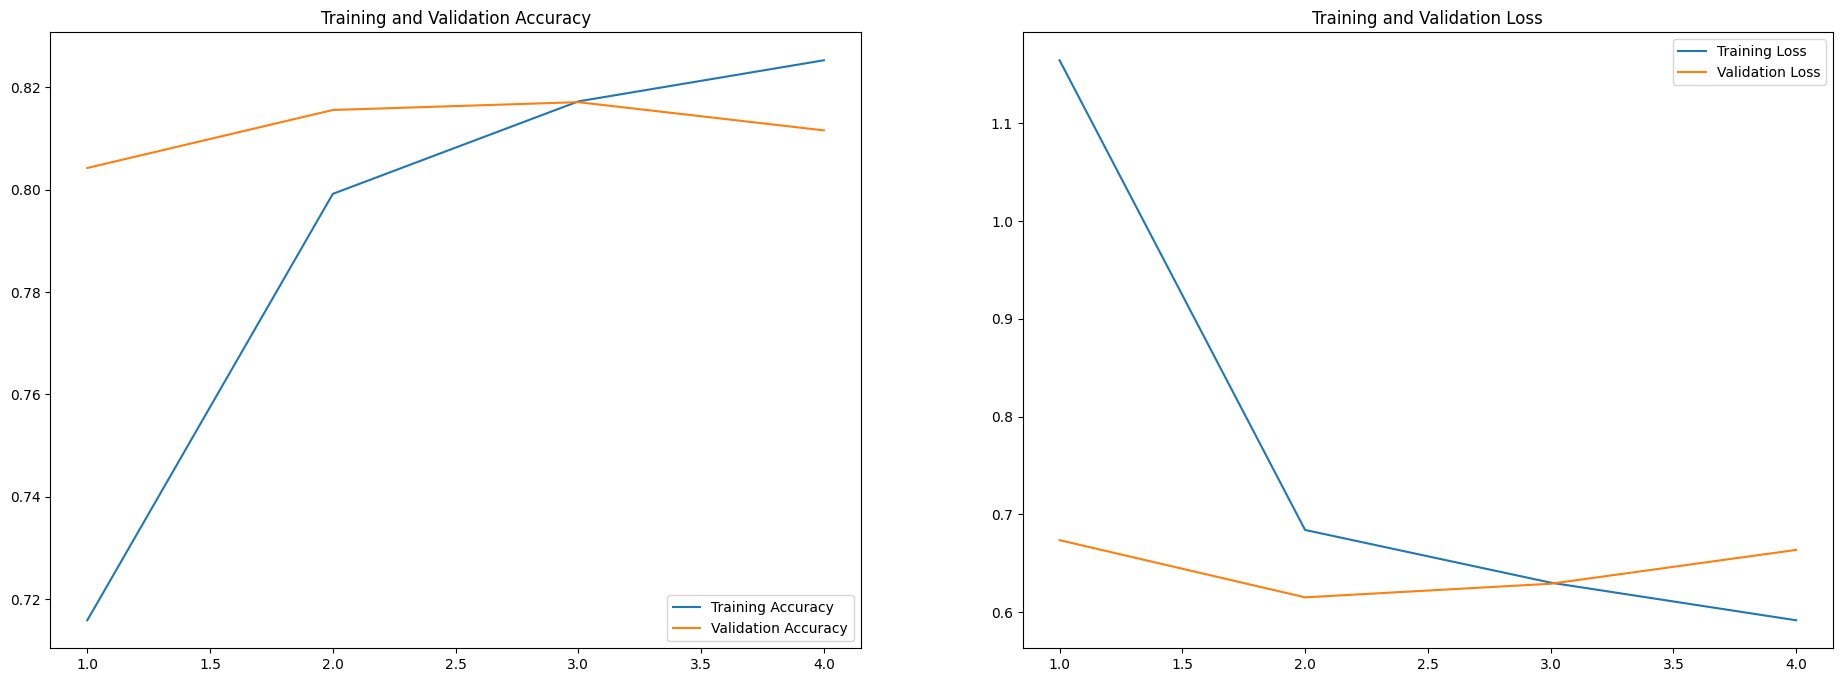

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

metrics = history.history['accuracy']
epochs_range = range(1, len(metrics) + 1) 

plt.figure(figsize=(23, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
model.evaluate(test_generator,
               steps=STEP_SIZE_TEST)

model_score = model.evaluate(test_generator, steps=STEP_SIZE_TEST)

print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])
    
model.save("dog_breeds_model.h5")
print("Weights Saved")

25/25 [==============================] - 20s 802ms/step - loss: 0.7668 - accuracy: 0.8037
Model Test Loss: 0.7667720913887024
Model Test Accuracy: 0.8037499785423279
Weights Saved


In [32]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/dog_breeds_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('dog_breeds_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [33]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [41]:
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def predict_cat_breed(image_path, model_path='/content/dog_breeds_model.h5'):
    # Load the trained model
    model = load_model(model_path)

    # Preprocess the input image
    img = preprocess_image(image_path, target_size=(299, 299))

    # Make predictions
    prediction = model.predict(img)

    # Find the index of the breed with the highest probability
    breed_index = np.argmax(prediction)

    # Find the breed name corresponding to the index
    breed_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(breed_index)]

    return breed_name

In [49]:
# Test the model with a sample image
image_path = '/content/images.jpeg'
predicted_breed = predict_cat_breed(image_path)
pbd = predicted_breed.split('-')[1]
print(f'The predicted dog breed is: {pbd}')

1/1 [==============================] - 1s 1s/step
The predicted dog breed is: cairn
